<a href="https://colab.research.google.com/github/ADRopentech/BigData-MachineLeaarning/blob/main/CIDA/Cod/Full_prototype_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pysindy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 kB 1.4 MB/s eta 0:00:00


In [ ]:
import pysindy as ps
import pandas as pd
import numpy as np
import scipy import interpolate as scin

In [ ]:
# @title loading csv and creating dataframes

df_channel_0180 = pd.read_csv('Channel_csv_0180.csv')
df_channel_0550 = pd.read_csv('Channel_csv_0550.csv')
df_channel_1000 = pd.read_csv('Channel_csv_1000.csv')
df_channel_2000 = pd.read_csv('Channel_csv_2000.csv')
df_channel_5200 = pd.read_csv('Channel_csv_5200.csv')
df_parameter = pd.read_csv('parameters.csv')
df_choices = pd.read_csv('optimizer_library_degree.csv')

In [ ]:
df_train = pd.concat([df_channel_0180, df_channel_1000, df_channel_5200], ignore_index = True)
df_train.count()

y/delta             1120
y^+                 1120
U                   1120
dU/dy               1120
W                   1120
P                   1120
u'u'                1120
v'v'                1120
w'w'                1120
u'v'                1120
u'w'                1120
v'w'                1120
k                   1120
omega_x'omega_x'    1120
omega_y'omega_y'    1120
omega_z'omega_z'    1120
omega_x'omega_y'    1120
omega_x'omega_z'    1120
omega_y'omega_z'    1120
p'p'                1120
u'p'                1120
v'p'                1120
w'p'                1120
dtype: int64

In [ ]:
df_test = df_channel_2000#pd.concat([df_channel_0550, df_channel_2000], ignore_index = True)
df_test.count()

y/delta             384
y^+                 384
U                   384
dU/dy               384
W                   384
P                   384
u'u'                384
v'v'                384
w'w'                384
u'v'                384
u'w'                384
v'w'                384
k                   384
omega_x'omega_x'    384
omega_y'omega_y'    384
omega_z'omega_z'    384
omega_x'omega_y'    384
omega_x'omega_z'    384
omega_y'omega_z'    384
p'p'                384
u'p'                384
v'p'                384
w'p'                384
dtype: int64

'y/delta', 'y^+', 'U', 'dU/dy', 'W', 'P', 'u'u'', 'v'v'', 'w'w'', 'u'v'', 'u'w'', 'v'w'', 'k', 'omega_x'omega_x'', 'omega_y'omega_y'', 'omega_z'omega_z'', 'omega_x'omega_y'', 'omega_x'omega_z'', 'omega_y'omega_z'', 'p'p'', 'u'p'', 'v'p'', 'w'p''

In [ ]:
# @title training data features

train_y = np.array(df_train['y^+'])
train_U = np.array(df_train['U'])
train_du_dy = np.array(df_train['dU/dy'])
train_W = np.array(df_train['W'])
train_spatial_y = np.array(df_train['y^+'])

train_features_1 = np.stack([train_U, train_du_dy, train_W], axis = 1)
train_features_2 = np.stack([train_U, train_du_dy, train_W, train_y], axis = 1)
train_features_3 = np.stack([train_U, train_du_dy], axis = 1)
train_features_4 = np.stack([train_U, train_du_dy, train_y], axis = 1)

In [ ]:
# @title interpolating testing variables

def interpolation(variable_to_interpolate, variable_against, variable span):
  f = scin.interp1d(variable_to_interpolate, variable_against, kind = 'linear')
  variable_new = f(variable_span)
  return variable_new

In [ ]:
# @title testing data features

test_y = np.array(df_test['y^+'])
test_U = np.array(df_test['U'])
test_du_dy = np.array(df_test['dU/dy'])
test_W = np.array(df_test['W'])
test_spatial_y = np.array(df_test['y^+'])

test_y_new = np.linspace(test_y[0],test_y[-1], new_point_count)
test_U_new = interpolation(test_U, test_y, test_y_new)
test_du_dy_new = interpolation(test_du_dy, test_y, test_y_new)
test_W_new = interpolation(test_W, test_y, test_y_new)

#test_features_1 = np.stack([ , test_du_dy, test_W], axis = 1)
#test_features_2 = np.stack([test_U, test_du_dy, test_W, test_y], axis = 1)
#test_features_3 = np.stack([test_U, test_du_dy], axis = 1)
#test_features_4 = np.stack([test_U, test_du_dy, test_y], axis = 1)

In [ ]:
# @title training data targets

train_uu = np.array(df_train["u'u'"])
train_vv = np.array(df_train["v'v'"])
train_ww = np.array(df_train["w'w'"])
train_uv = np.array(df_train["u'v'"])
train_uw = np.array(df_train["u'w'"])
train_vw = np.array(df_train["v'w'"])

train_target = np.stack((train_uu, train_vv, train_ww, train_uv, train_uw, train_vw), axis = 1)

In [ ]:
# @title testing data targets

test_uu = np.array(df_test["u'u'"])
test_vv = np.array(df_test["v'v'"])
test_ww = np.array(df_test["w'w'"])
test_uv = np.array(df_test["u'v'"])
test_uw = np.array(df_test["u'w'"])
test_vw = np.array(df_test["v'w'"])

test_target = np.stack((test_uu, test_vv, test_ww, test_uv, test_uw, test_vw), axis = 1)

In [ ]:
# @title function to choose training features

def training_feature_choice(user_input):
  # user inputs 1, 2, 3 , 4

  try:
    #if else block
    if user_input == 1:
      return train_features_1 # U, du_dy, W
    elif user_input == 2:
      return train_features_2 # U, du_dy, W, y
    elif user_input == 3:
      return train_features_3 # U, du_dy
    elif user_input == 4:
      return train_features_4 # U, du_dy, y
  except:
    print("Choose between 1, 2, 3 or 4 for features.")

In [ ]:
# @title function to choose testing features

def testing_feature_choice(user_input):
  # user inputs 1, 2, 3 , 4


  try:
    #if else block
    if user_input == 1:
      return test_features_1 # U, du_dy, W
    elif user_input == 2:
      return test_features_2 # U, du_dy, W, y
    elif user_input == 3:
      return test_features_3 # U, du_dy
    elif user_input == 4:
      return test_features_4 # U, du_dy, y
  except:
    print("Choose between 1, 2, 3 or 4 for features.")

In [ ]:
# @title function to choose optimizer

def optimizer_choice(user_input):
  # user inputs STLSQ, SR3, FROLS

  try:
    if user_input == 'STLSQ':
      return ps.STLSQ(threshold=0.01, normalize_columns=False)
    elif user_input == 'SR3':
      return ps.SR3(threshold=0.01, normalize_columns=False)
    elif user_input == 'FROLS':
      return ps.FROLS(alpha=0.01, normalize_columns=False)
  except:
    print("Enter 'STLSQ', 'SR3' or 'FROLS' for optimizer")

In [ ]:
# @title function to choose target library

def target_library_choice(user_input, degree_input):
  #user_input pde_lib, weak_pde_lib, poly_lib / degree_input 1, 2 or 3

  library_options = ['pde_lib', 'weak_pde_lib', 'poly_lib']
  degree_options = [1,2,3]

  if user_input not in library_options:
    print('issue with library options.')

  if degree_input not in degree_options:
    print('incorrect degree input.')


  if user_input == 'pde_lib':
    pde_lib = ps.PDELibrary(
        spatial_grid =  train_spatial_y,
        derivative_order = degree_input,
        is_uniform = False
     )
    return pde_lib
  elif user_input == 'weak_pde_lib':
    weak_pde_lib = ps.WeakPDELibrary(
        spatiotemporal_grid = train_spatial_y,
        derivative_order = degree_input,
        is_uniform = False
    )
    return weak_pde_lib
  elif user_input == 'poly_lib':
    poly_lib = ps.PolynomialLibrary(degree = degree_input)
    return poly_lib


In [ ]:
# @title function to visualze and compare predicted and actual value curves.

from matplotlib import pyplot as plt

def visualize(df_preds, predicted_parameter, actual_parameter):
  df_preds[predicted_parameter].plot(kind='line', figsize=(10,6), title=f'{predicted_parameter}_predicted_target')
  df_test[actual_parameter].plot(kind='line', figsize=(10,6), title=f'{actual_parameter}_target')
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.legend()

In [ ]:
# @title main function that calls everything
# feature_input choose 1, 2, 3 or 4
# library_input choose 'pde_lib', 'weak_pde_lib', 'poly_lib'
# degree_order_input choose 1, 2 or 3
# optimizse_input choose 'STLSQ', 'SR3' or 'FROLS'

def main_function(feature_input, library_input, degree_order_input, optimizer_input):
  training_features = training_feature_choice(feature_input)
  #print(len(training_features))
  testing_features = testing_feature_choice(feature_input)
  #print(len(testing_features))
  target = train_target
  #print(len(target))

  library = target_library_choice(library_input, degree_order_input)

  optimizer = optimizer_choice(optimizer_input)

  model = ps.SINDy(
      feature_library = library,
      feature_names = ['uu','vv','ww', 'uv', 'uw', 'vw'],
      optimizer = optimizer
  )

  model.fit(x = training_features, x_dot = target)

  model.print()

  predictions = model.predict(x = testing_features)
  predicted_column_names = ['uu', 'vv', 'ww', 'uv', 'uw', 'vw']

  df_predictions = pd.DataFrame(predictions, columns=predicted_column_names)

  visualize(df_predictions, 'uu', "u'u'")
  visualize(df_predictions, 'vv', "v'v'")
  visualize(df_predictions, 'ww', "w'w'")
  visualize(df_predictions, 'uv', "u'v'")
  visualize(df_predictions, 'uw', "u'w'")
  visualize(df_predictions, 'vw', "v'w'")

1120
384
1120
(uu)' = 13.496 1 + -0.465 uu + -10.686 vv + 210.415 ww
(vv)' = 1.985 1 + -0.049 uu + -2.095 vv + 28.244 ww
(ww)' = 4.836 1 + -0.157 uu + -4.452 vv + 59.158 ww
(uv)' = -2.196 1 + 0.072 uu + 2.122 vv + -38.562 ww
(uw)' = 0.072 ww
(vw)' = 0.000


/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(


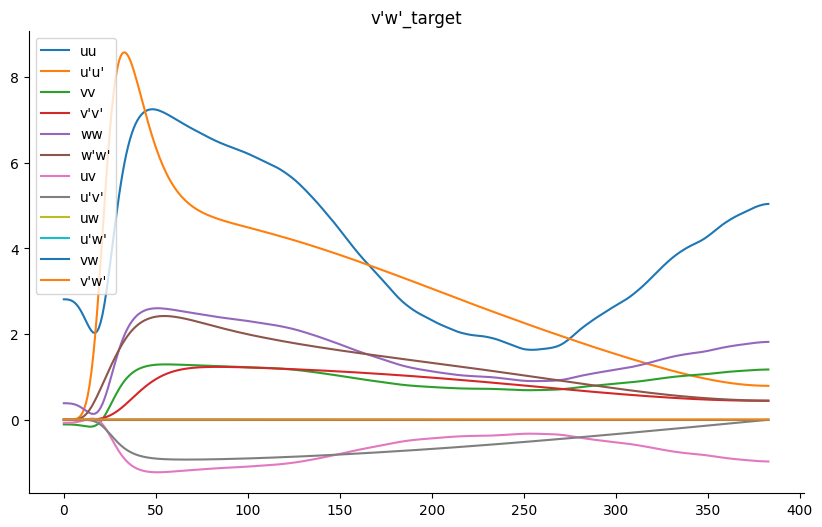

In [ ]:
main_function(1,'poly_lib',1,'STLSQ')

1120
384
1120
(uu)' = -3.281 1 + 1.062 uu + 32.148 vv + 783.405 ww + -0.033 uu^2 + -0.927 uu vv + -33.098 uu ww + -28.837 vv^2 + -1963.521 vv ww + -50447.781 ww^2
(vv)' = 2.592 1 + -0.071 uu + -8.871 vv + 78.171 ww + 0.196 uu vv + -2.883 uu ww + 6.202 vv^2 + -155.120 vv ww + -8277.642 ww^2
(ww)' = 5.046 1 + -0.157 uu + -4.404 vv + 182.131 ww + -7.629 uu ww + -0.325 vv^2 + -727.311 vv ww + -19629.613 ww^2
(uv)' = -2.405 1 + 0.078 uu + 5.296 vv + -61.732 ww + -0.132 uu vv + 1.526 uu ww + -2.856 vv^2 + 148.679 vv ww + 5387.825 ww^2
(uw)' = 0.000
(vw)' = 0.000


/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(


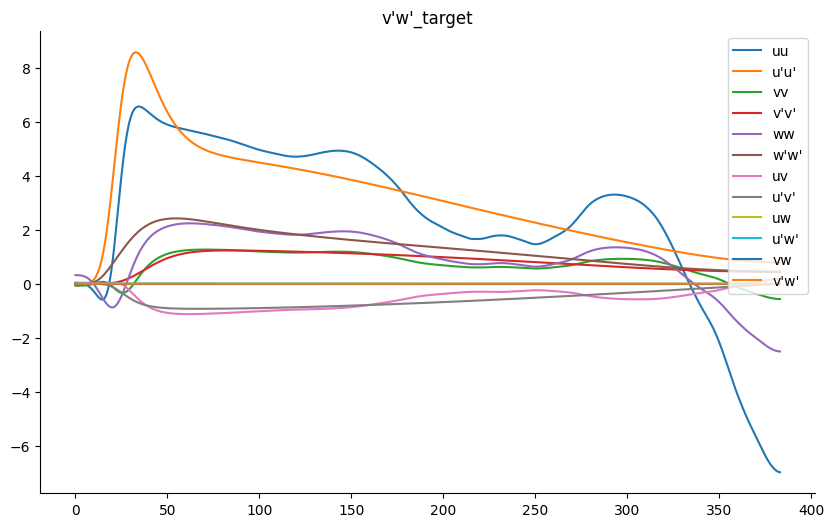

In [ ]:
main_function(1,'poly_lib',2,'STLSQ')

1120
384
1120
(uu)' = 2.856 1 + 0.782 uu + 397.149 vv + -1530.578 ww + -0.032 uu^2 + -30.842 uu vv + 160.291 uu ww + -665.548 vv^2 + -5181.953 vv ww + -182135.046 ww^2 + 0.229 uu^2 vv + -3.814 uu^2 ww + 29.172 uu vv^2 + 559.097 uu vv ww + 7130.189 uu ww^2 + 265.726 vv^3 + 3396.478 vv^2 ww
(vv)' = 4.254 1 + -0.140 uu + 24.091 vv + -104.491 ww + -1.845 uu vv + 13.040 uu ww + -37.627 vv^2 + -87.312 vv ww + -38653.018 ww^2 + -0.062 uu^2 vv + -0.295 uu^2 ww + 1.931 uu vv^2 + 44.955 uu vv ww + 1625.669 uu ww^2 + 9.309 vv^3
(ww)' = 8.179 1 + -0.288 uu + 106.885 vv + -484.016 ww + -8.493 uu vv + 49.866 uu ww + -187.368 vv^2 + -550.315 vv ww + -83840.611 ww^2 + -0.014 uu^2 vv + -1.128 uu^2 ww + 8.573 uu vv^2 + 110.787 uu vv ww + 3447.300 uu ww^2 + 72.357 vv^3 + 139.484 vv^2 ww
(uv)' = -3.516 1 + 0.125 uu + -20.254 vv + -240.555 ww + 1.810 uu vv + 19.081 uu ww + 35.050 vv^2 + 266.874 vv ww + 35775.988 ww^2 + 0.013 uu^2 vv + -0.453 uu^2 ww + -1.828 uu vv^2 + -26.357 uu vv ww + -1536.345 uu ww^2 +

/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(


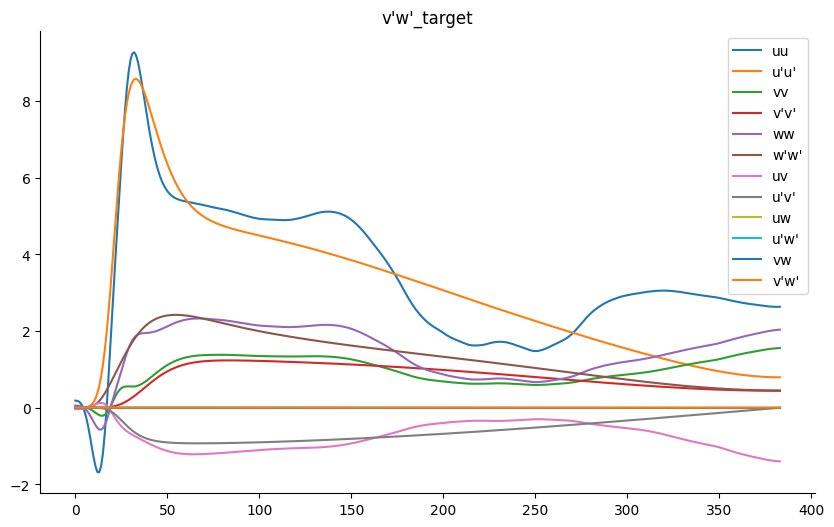

In [ ]:
main_function(1,'poly_lib',3,'STLSQ')

1120
384
1120
(uu)' = 13.496 1 + -0.465 uu + -10.686 vv + 210.415 ww
(vv)' = 1.985 1 + -0.049 uu + -2.095 vv + 28.244 ww
(ww)' = 4.836 1 + -0.157 uu + -4.452 vv + 59.158 ww
(uv)' = -2.196 1 + 0.072 uu + 2.122 vv + -38.562 ww
(uw)' = 0.072 ww
(vw)' = -0.046 ww


/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/sr3.py:390: ConvergenceWarning: SR3._reduce did not converge after 30 iterations.
  warnings.warn(


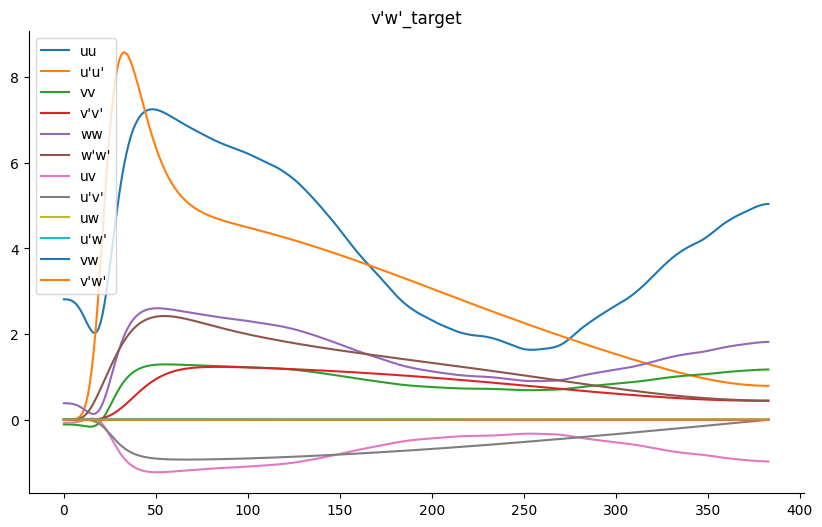

In [ ]:
main_function(1,'poly_lib',1,'SR3')

1120
384
1120
(uu)' = -3.281 1 + 1.062 uu + 32.148 vv + 783.405 ww + -0.033 uu^2 + -0.927 uu vv + -33.098 uu ww + -28.837 vv^2 + -1963.521 vv ww + -50447.781 ww^2
(vv)' = 2.592 1 + -0.071 uu + -8.871 vv + 78.171 ww + 0.196 uu vv + -2.883 uu ww + 6.202 vv^2 + -155.120 vv ww + -8277.642 ww^2
(ww)' = 5.046 1 + -0.157 uu + -4.404 vv + 182.131 ww + -7.629 uu ww + -0.325 vv^2 + -727.311 vv ww + -19629.613 ww^2
(uv)' = -2.405 1 + 0.078 uu + 5.296 vv + -61.732 ww + -0.132 uu vv + 1.526 uu ww + -2.856 vv^2 + 148.679 vv ww + 5387.825 ww^2
(uw)' = 0.002 1 + -0.024 vv + -1.894 ww + 0.117 uu ww + 0.022 vv^2 + -0.768 vv ww + 108.106 ww^2
(vw)' = -0.139 ww + 0.887 vv ww + -22.398 ww^2


/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/sr3.py:390: ConvergenceWarning: SR3._reduce did not converge after 30 iterations.
  warnings.warn(


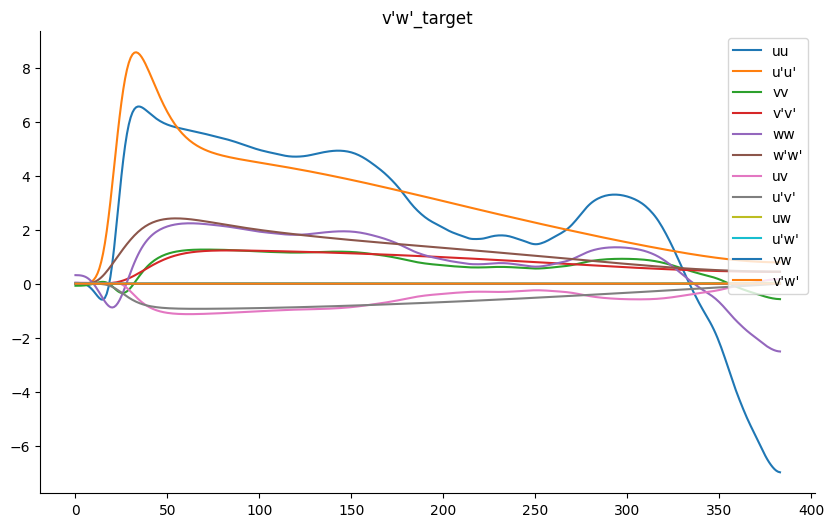

In [ ]:
main_function(1,'poly_lib',2,'SR3')

1120
384
1120
(uu)' = 6.064 1 + 0.586 uu + 377.454 vv + 329.290 ww + -0.030 uu^2 + -29.318 uu vv + -26.916 uu ww + -622.505 vv^2 + -26753.136 vv ww + -367102.744 ww^2 + 0.099 uu^2 vv + 0.734 uu^2 ww + 27.988 uu vv^2 + 1595.334 uu vv ww + 14995.834 uu ww^2 + 239.131 vv^3 + 21601.324 vv^2 ww + 1566446.287 vv ww^2 + 94317.158 ww^3
(vv)' = -0.315 1 + 0.255 uu + 9.867 vv + -391.438 ww + -0.009 uu^2 + -1.048 uu vv + 39.424 uu ww + -10.531 vv^2 + 522.243 vv ww + -54649.531 ww^2 + -0.016 uu^2 vv + -0.896 uu^2 ww + 0.772 uu vv^2 + -34.740 uu vv ww + 2346.466 uu ww^2 + 0.991 vv^3 + -97.133 vv^2 ww + 155769.858 vv ww^2 + 295733.666 ww^3
(ww)' = 6.969 1 + -0.157 uu + 93.204 vv + -6.106 ww + -0.003 uu^2 + -7.580 uu vv + -0.040 uu ww + -159.415 vv^2 + -8273.847 vv ww + -152444.238 ww^2 + -0.035 uu^2 vv + 0.111 uu^2 ww + 7.591 uu vv^2 + 475.762 uu vv ww + 6402.930 uu ww^2 + 59.275 vv^3 + 6793.738 vv^2 ww + 586023.895 vv ww^2 + 246090.747 ww^3
(uv)' = 1.410 1 + -0.298 uu + -4.429 vv + 105.969 ww + 0.0

/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/sr3.py:390: ConvergenceWarning: SR3._reduce did not converge after 30 iterations.
  warnings.warn(


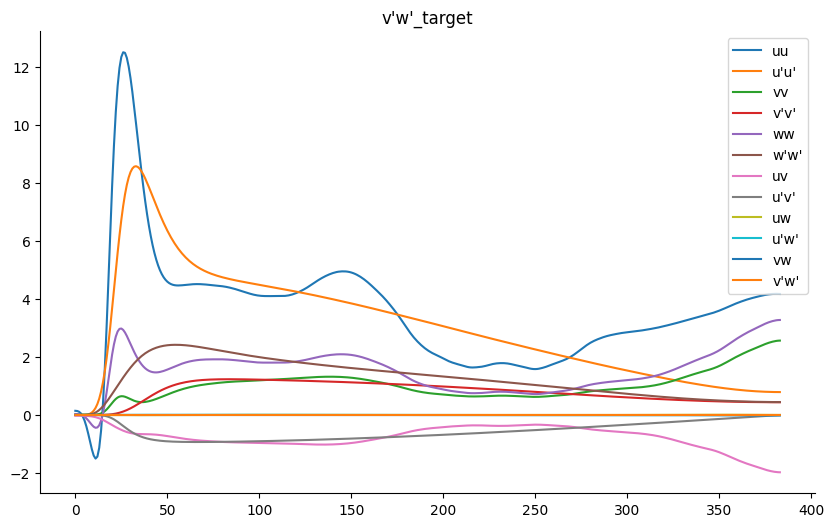

In [ ]:
main_function(1,'poly_lib',3,'SR3')

1120
384
1120
Enter 'STLSQ', 'SR3' or 'FROLS' for optimizer
(uu)' = 13.496 1 + -0.465 uu + -10.686 vv + 210.415 ww
(vv)' = 0.894 1 + -0.982 vv + 12.456 ww
(ww)' = 4.836 1 + -0.157 uu + -4.452 vv + 59.158 ww
(uv)' = -0.607 1 + 0.501 vv + -15.571 ww
(uw)' = 0.000
(vw)' = 0.000


/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(


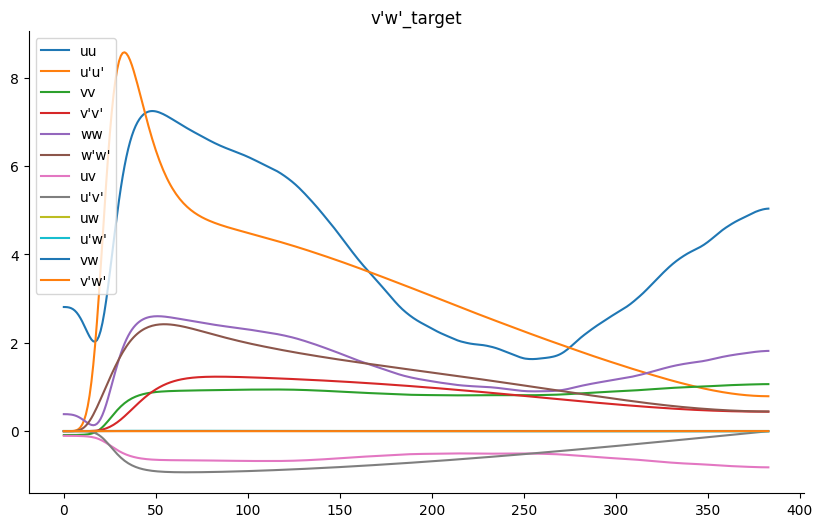

In [ ]:
main_function(1,'poly_lib',1,'FROLS')

1120
384
1120
Enter 'STLSQ', 'SR3' or 'FROLS' for optimizer
(uu)' = 10.521 1 + -0.326 uu + 2.065 vv + 0.539 uu vv + 2.024 uu ww + -12.606 vv^2 + -508.830 vv ww + -43403.846 ww^2
(vv)' = 0.904 1 + -1.571 vv + 0.930 uu ww + 0.634 vv^2 + -202.117 vv ww
(ww)' = 1.218 1 + 4.298 vv + -387.720 ww + 18.575 uu ww + -5.636 vv^2 + -28.124 vv ww
(uv)' = -0.582 1 + -1.240 vv + -1.031 uu ww + 1.918 vv^2 + 163.876 vv ww
(uw)' = 0.000
(vw)' = 0.000


/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(


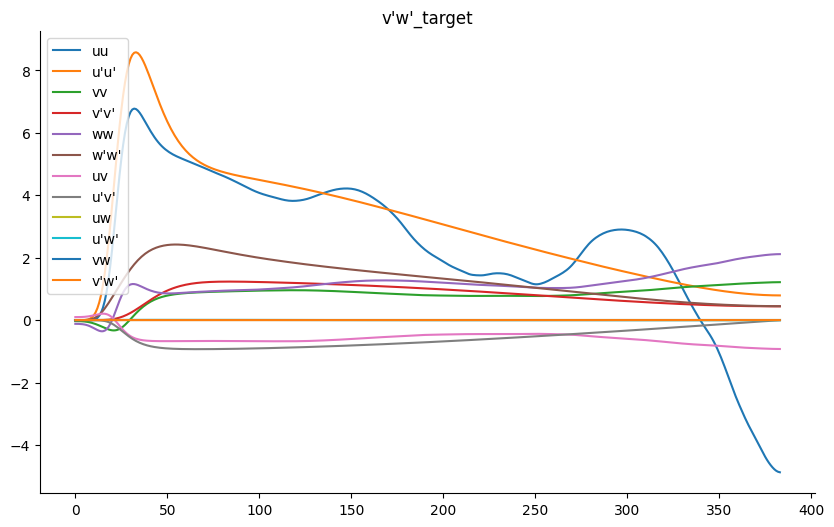

In [ ]:
main_function(1,'poly_lib',2,'FROLS')

1120
384
1120
Enter 'STLSQ', 'SR3' or 'FROLS' for optimizer
(uu)' = 19.105 1 + -0.661 uu + 460.354 vv + -1910.560 ww + -34.153 uu vv + 205.608 uu ww + -769.773 vv^2 + -13345.880 vv ww + -0.021 uu^2 vv + -5.112 uu^2 ww + 33.861 uu vv^2 + 1018.432 uu vv ww + -1203.775 uu ww^2 + 290.552 vv^3 + 11602.622 vv^2 ww
(vv)' = 0.989 1 + -0.904 vv + -122.087 ww + 4.399 uu ww + -2.537 vv^2 + 25.786 uu vv ww + -558.716 uu ww^2 + 2.490 vv^3
(ww)' = 7.080 1 + -0.235 uu + 137.155 vv + -10.175 uu vv + 0.672 uu ww + -236.367 vv^2 + -158.609 vv ww + -0.038 uu^2 vv + 10.258 uu vv^2 + 26.682 uu vv ww + -700.358 uu ww^2 + 92.158 vv^3
(uv)' = -0.420 1 + 114.995 vv + -88.750 ww + -8.307 uu vv + 2.790 uu ww + -190.848 vv^2 + 8.114 uu vv^2 + 64.301 uu vv ww + 291.840 uu ww^2 + 76.304 vv^3
(uw)' = 0.000
(vw)' = 0.000


/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(


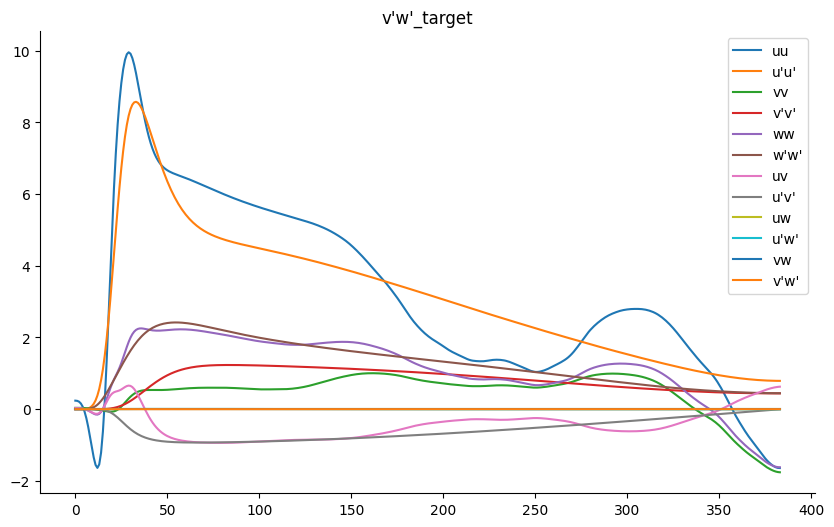

In [ ]:
main_function(1,'poly_lib',3,'FROLS')

1120
384
1120
(uu)' = 13.496 1 + -0.465 uu + -10.686 vv + 210.415 ww
(vv)' = 1.985 1 + -0.049 uu + -2.095 vv + 28.244 ww
(ww)' = 4.836 1 + -0.157 uu + -4.452 vv + 59.158 ww
(uv)' = -2.196 1 + 0.072 uu + 2.122 vv + -38.562 ww
(uw)' = 0.072 ww
(vw)' = 0.000


/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(


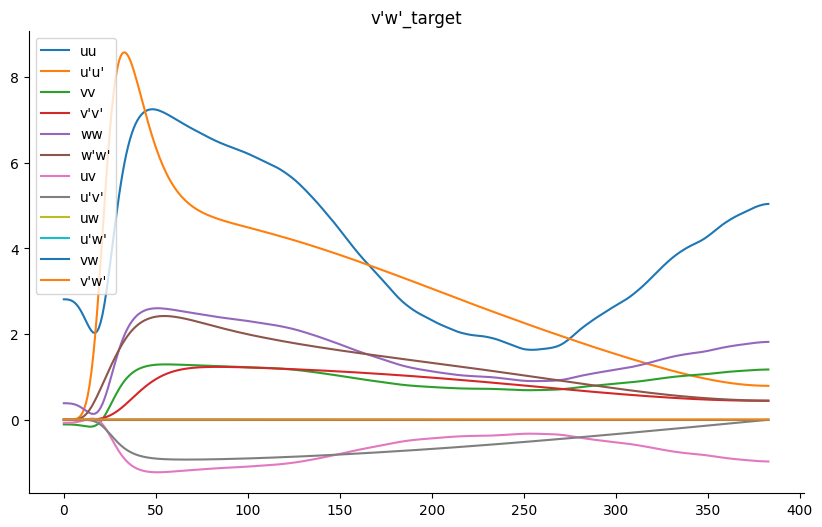

In [ ]:
main_function(2,'poly_lib',1,'STLSQ')

1120
384
1120
(uu)' = -0.349 1 + 0.561 uu + 22.217 vv + -160.852 ww + -0.023 uu^2 + -1.538 uu vv + 19.791 uu ww + -21.866 vv^2 + -813.741 vv ww + 1.185 vv uv + -46238.324 ww^2 + -0.183 ww uv
(vv)' = 2.068 1 + -0.084 uu + -8.444 vv + -100.493 ww + -0.132 uu vv + 7.275 uu ww + 6.304 vv^2 + 64.201 vv ww + 0.343 vv uv + -8579.513 ww^2 + -0.044 ww uv
(ww)' = 4.467 1 + -0.188 uu + -9.748 vv + -170.476 ww + -0.181 uu vv + 12.711 uu ww + 5.233 vv^2 + -310.338 vv ww + 0.517 vv uv + -18401.797 ww^2 + -0.078 ww uv
(uv)' = -1.576 1 + 0.079 uu + 73.831 ww + 0.426 uu vv + -5.671 uu ww + 1.385 vv^2 + -41.037 vv ww + -0.356 vv uv + 7035.347 ww^2 + 0.036 ww uv
(uw)' = 0.000
(vw)' = 0.000


/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(


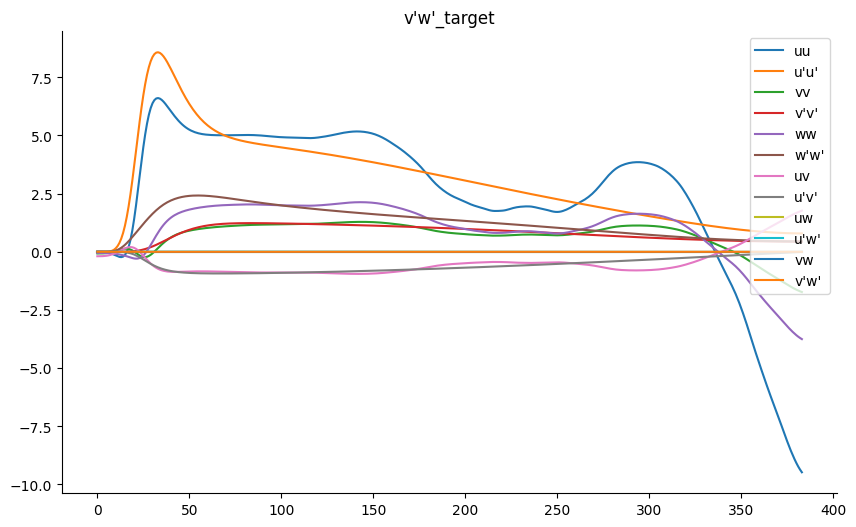

In [ ]:
main_function(2,'poly_lib',2,'STLSQ')

1120
384
1120
(uu)' = 27.251 1 + -2.651 uu + 864.764 vv + -15306.193 ww + 0.063 uu^2 + -59.867 uu vv + 1491.664 uu ww + -1331.646 vv^2 + -30800.924 vv ww + 15.323 vv uv + -2.756 ww uv + -0.703 uu^2 vv + -35.802 uu^2 ww + 80.780 uu vv^2 + 3149.933 uu vv ww + -0.573 uu vv uv + -592.903 uu ww^2 + 0.112 uu ww uv + 439.427 vv^3 + 30844.392 vv^2 ww + -33.438 vv^2 uv + 60.991 vv ww uv + 6.525 ww^2 uv
(vv)' = 4.784 1 + -0.182 uu + 102.629 vv + -928.754 ww + -7.075 uu vv + 88.345 uu ww + -166.213 vv^2 + 0.289 vv uv + -0.037 ww uv + -0.133 uu^2 vv + -1.672 uu^2 ww + 6.367 uu vv^2 + 196.336 uu vv ww + -0.001 uu vv uv + -467.387 uu ww^2 + 58.784 vv^3 + 0.583 vv^2 uv + -56.771 vv ww uv + 5.718 ww^2 uv
(ww)' = 19.165 1 + -1.706 uu + 304.960 vv + -6489.023 ww + 0.038 uu^2 + -22.310 uu vv + 659.151 uu ww + -485.891 vv^2 + -9354.273 vv ww + 5.635 vv uv + 0.019 ww uv + -0.336 uu^2 vv + -16.676 uu^2 ww + 26.340 uu vv^2 + 1079.119 uu vv ww + -0.210 uu vv uv + -400.648 uu ww^2 + 0.006 uu ww uv + 161.678 vv

/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(


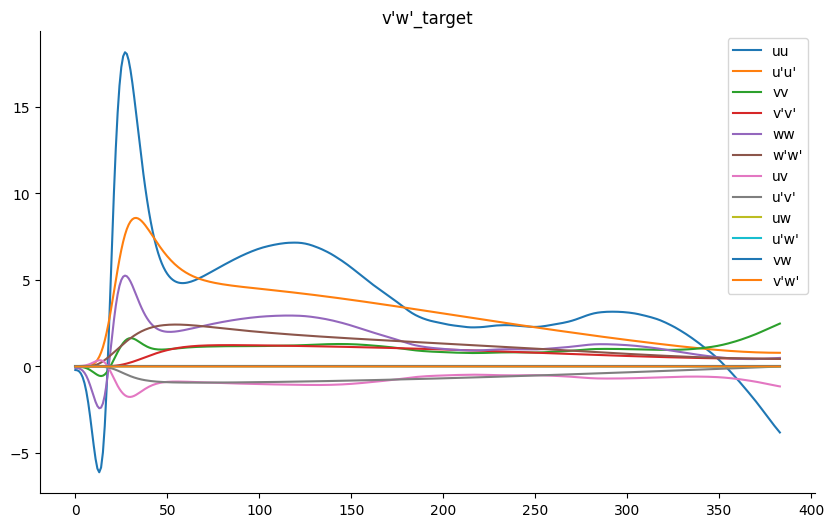

In [ ]:
main_function(2,'poly_lib',3,'STLSQ')

1120
384
1120
(uu)' = 13.496 1 + -0.465 uu + -10.686 vv + 210.415 ww
(vv)' = 0.894 1 + -0.982 vv + 12.456 ww
(ww)' = 4.836 1 + -0.157 uu + -4.452 vv + 59.158 ww
(uv)' = -2.196 1 + 0.072 uu + 2.122 vv + -38.562 ww
(uw)' = 0.003 1 + -0.005 vv + 0.281 ww
(vw)' = -0.046 ww


/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/sr3.py:390: ConvergenceWarning: SR3._reduce did not converge after 30 iterations.
  warnings.warn(


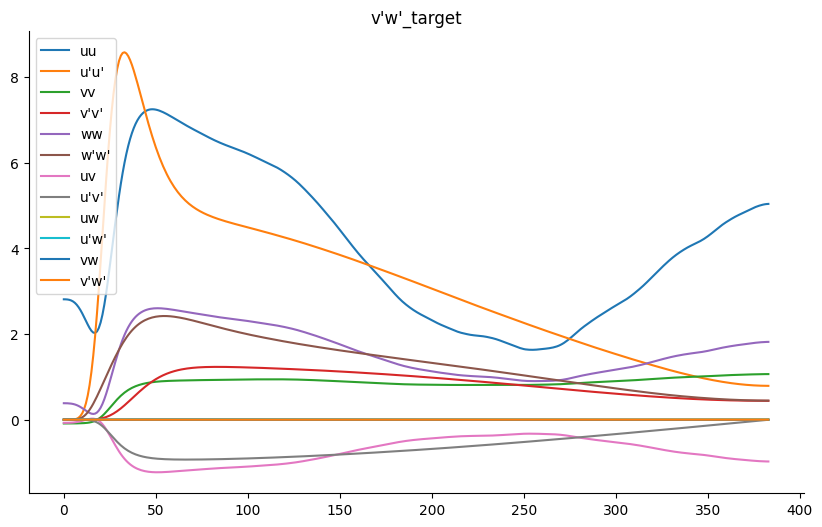

In [ ]:
main_function(2,'poly_lib',1,'SR3')

1120
384
1120
(uu)' = -3.371 1 + 0.899 uu + 28.100 vv + -136.507 ww + -0.032 uu^2 + -1.860 uu vv + 18.724 uu ww + -24.728 vv^2 + -870.449 vv ww + 1.183 vv uv + -45576.375 ww^2 + -0.178 ww uv
(vv)' = -3.948 1 + 0.551 uu + 4.525 vv + -139.839 ww + -0.016 uu^2 + -0.706 uu vv + 9.827 uu ww + -0.626 vv^2 + 66.499 vv ww + 0.267 vv uv + -6939.741 ww^2 + -0.043 ww uv
(ww)' = 3.609 1 + -0.105 uu + -7.640 vv + -194.263 ww + -0.002 uu^2 + -0.250 uu vv + 14.043 uu ww + 3.990 vv^2 + -286.163 vv ww + 0.491 vv uv + -18101.466 ww^2 + -0.080 ww uv
(uv)' = 1.434 1 + -0.256 uu + -2.419 vv + 76.268 ww + 0.009 uu^2 + 0.514 uu vv + -6.587 uu ww + 1.001 vv^2 + -1.513 vv ww + -0.300 vv uv + 5731.309 ww^2 + 0.037 ww uv
(uw)' = 0.001 1 + -0.032 vv + -1.981 ww + 0.001 uu vv + 0.120 uu ww + 0.031 vv^2 + -0.558 vv ww + 107.670 ww^2
(vw)' = 0.049 ww + -0.009 uu ww + 0.522 vv ww + -22.535 ww^2


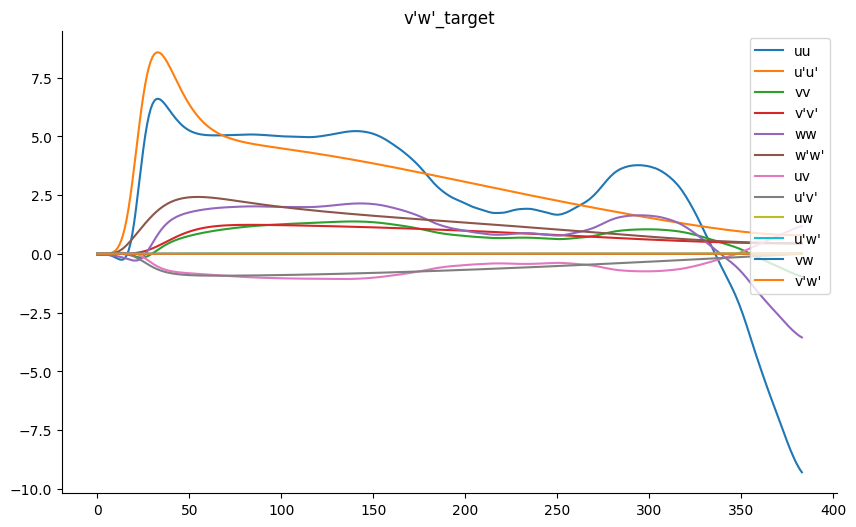

In [ ]:
main_function(2,'poly_lib',2,'SR3')

1120
384
1120
(uu)' = 15.804 1 + -7.054 uu + 754.705 vv + -37816.420 ww + 0.087 uv + 0.756 uu^2 + -35.026 uu vv + 4432.916 uu ww + -0.003 uu uv + -1151.918 vv^2 + 27339.603 vv ww + 8.683 vv uv + 337289.320 ww^2 + 14.125 ww uv + -0.023 uu^3 + -1.235 uu^2 vv + -131.987 uu^2 ww + 75.148 uu vv^2 + -579.180 uu vv ww + -0.359 uu vv uv + -21854.366 uu ww^2 + -0.411 uu ww uv + 381.284 vv^3 + -41.912 vv^2 uv + -176.639 vv ww uv + 92.059 ww^2 uv
(vv)' = 11.626 1 + -0.956 uu + 97.467 vv + -1048.995 ww + 0.002 uv + 0.020 uu^2 + -10.130 uu vv + 81.948 uu ww + -178.102 vv^2 + 1.606 vv uv + -1.249 ww uv + -0.056 uu^2 vv + -0.883 uu^2 ww + 2.378 uu vv^2 + 165.136 uu vv ww + -0.055 uu vv uv + -42.579 uu ww^2 + 0.043 uu ww uv + 69.014 vv^3 + 6.997 vv^2 uv + -18.378 vv ww uv + 0.464 ww^2 uv
(ww)' = 1.141 1 + -0.001 uu + 292.256 vv + -9088.656 ww + 0.021 uv + 0.032 uu^2 + -20.909 uu vv + 986.780 uu ww + -0.001 uu uv + -441.891 vv^2 + 5738.615 vv ww + 4.448 vv uv + 0.347 ww uv + -0.002 uu^3 + -0.225 uu^2 v

/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/sr3.py:390: ConvergenceWarning: SR3._reduce did not converge after 30 iterations.
  warnings.warn(


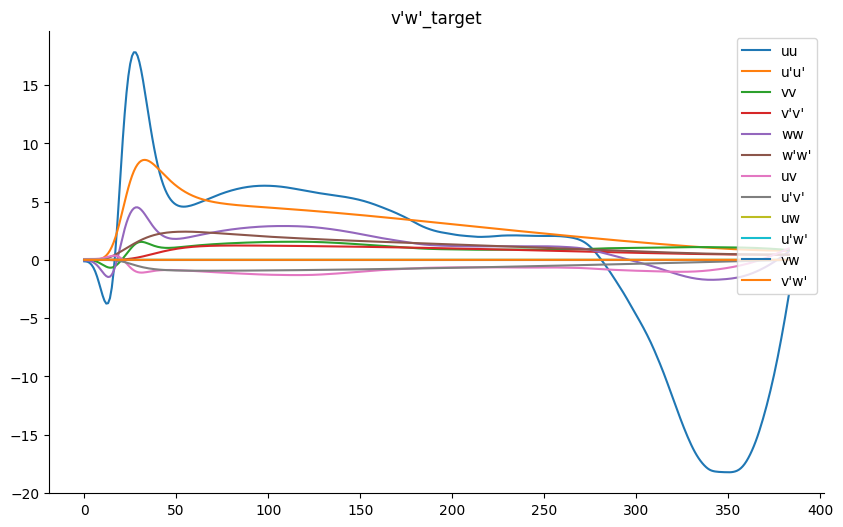

In [ ]:
main_function(2,'poly_lib',3,'SR3')

1120
384
1120
Enter 'STLSQ', 'SR3' or 'FROLS' for optimizer
(uu)' = 13.496 1 + -0.465 uu + -10.686 vv + 210.415 ww
(vv)' = 0.894 1 + -0.982 vv + 12.456 ww
(ww)' = 4.836 1 + -0.157 uu + -4.452 vv + 59.158 ww
(uv)' = -0.607 1 + 0.501 vv + -15.571 ww
(uw)' = 0.000
(vw)' = 0.000


/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(


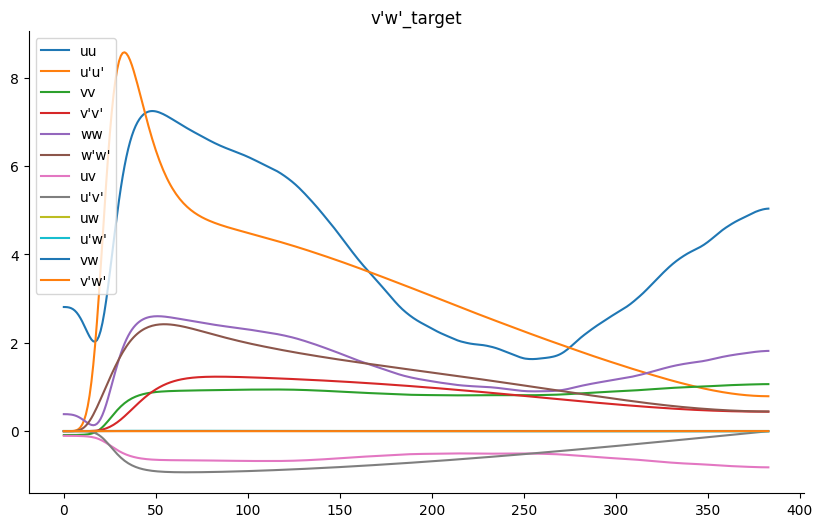

In [ ]:
main_function(2,'poly_lib',1,'FROLS')

1120
384
1120
Enter 'STLSQ', 'SR3' or 'FROLS' for optimizer
(uu)' = 9.655 1 + -0.443 uu + -2.874 vv + -854.657 ww + -0.491 uu vv + 62.179 uu ww + -6.897 vv^2 + -695.656 vv ww + 1.288 vv uv + -0.243 ww uv
(vv)' = 0.567 1 + -0.932 vv + -0.141 uu vv + 0.347 vv^2 + 0.135 vv uv
(ww)' = 5.157 1 + -0.170 uu + -10.539 vv + 150.757 ww + 0.318 uu vv + -3.097 uu ww + 5.316 vv^2 + -1074.431 vv ww
(uv)' = 0.153 uu vv + -0.236 vv uv
(uw)' = 0.000
(vw)' = 0.000


/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(


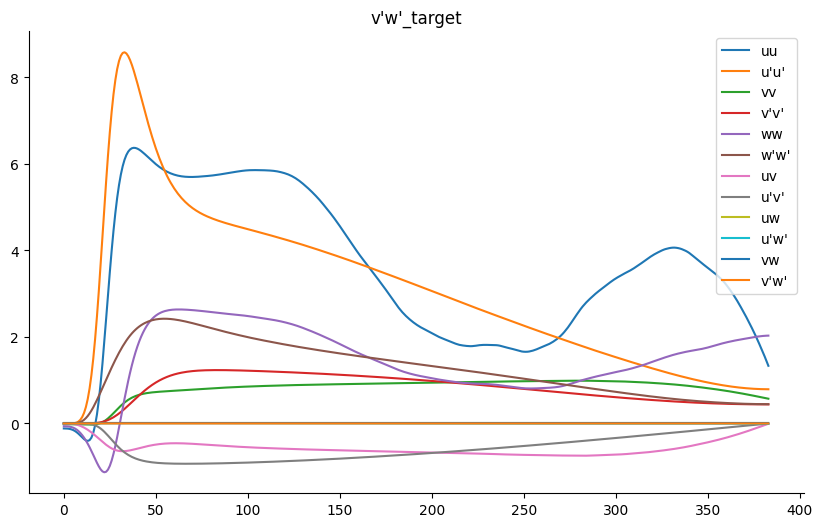

In [ ]:
main_function(2,'poly_lib',2,'FROLS')

1120
384
1120
Enter 'STLSQ', 'SR3' or 'FROLS' for optimizer
(uu)' = -0.137 1 + 0.070 uu + 710.108 vv + -17091.618 ww + -43.247 uu vv + 1721.865 uu ww + -1043.911 vv^2 + 10561.024 vv ww + 11.363 vv uv + 0.362 ww uv + -0.557 uu^2 vv + -42.647 uu^2 ww + 75.231 uu vv^2 + 386.291 uu vv ww + -0.441 uu vv uv + 333.734 vv^3 + -43.052 vv^2 uv + -50.628 vv ww uv + 7.577 ww^2 uv
(vv)' = 0.797 1 + -59.396 vv + 4.836 uu vv + 0.615 uu ww + 105.537 vv^2 + -38.918 uu vv ww + -46.915 vv^3 + -4.846 vv^2 uv + 4.204 vv ww uv + -1.894 ww^2 uv
(ww)' = 8.662 1 + -0.327 uu + 155.665 vv + -13.240 uu vv + 5.647 uu ww + -278.544 vv^2 + 243.401 vv ww + 0.148 vv uv + -0.032 uu^2 vv + 6.248 uu vv^2 + -39.315 uu vv ww + 114.210 vv^3 + 7.072 vv^2 uv + -4.173 vv ww uv + 7.022 ww^2 uv
(uv)' = -0.276 1 + -0.986 uu vv + 0.319 vv^2 + -0.113 vv uv + -3.783 uu vv^2 + 14.717 uu vv ww + 4.829 vv^2 uv + -1.651 vv ww uv + 2.528 ww^2 uv
(uw)' = 0.000
(vw)' = 0.000


/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(


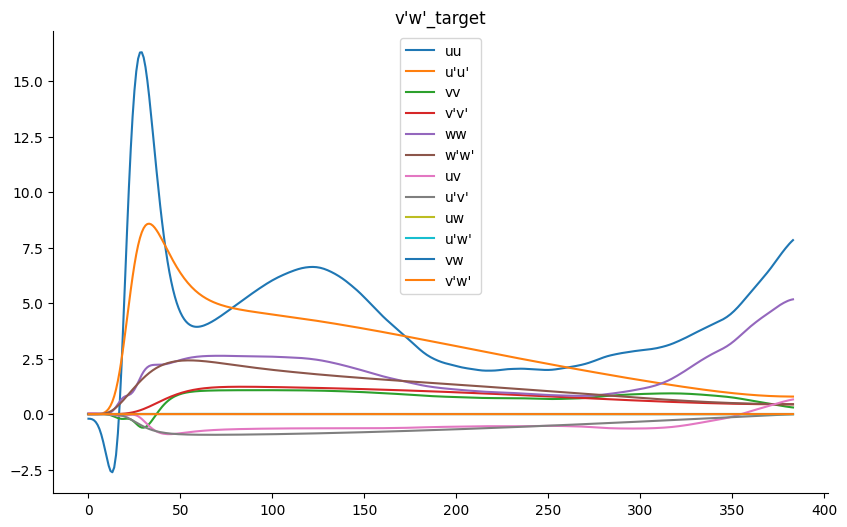

In [ ]:
main_function(2,'poly_lib',3,'FROLS')

1120
384
1120
(uu)' = 11.967 1 + -0.404 uu + -9.106 vv
(vv)' = 1.780 1 + -0.041 uu + -1.883 vv
(ww)' = 4.406 1 + -0.140 uu + -4.008 vv
(uv)' = -1.915 1 + 0.060 uu + 1.832 vv
(uw)' = 0.000
(vw)' = 0.000


/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(


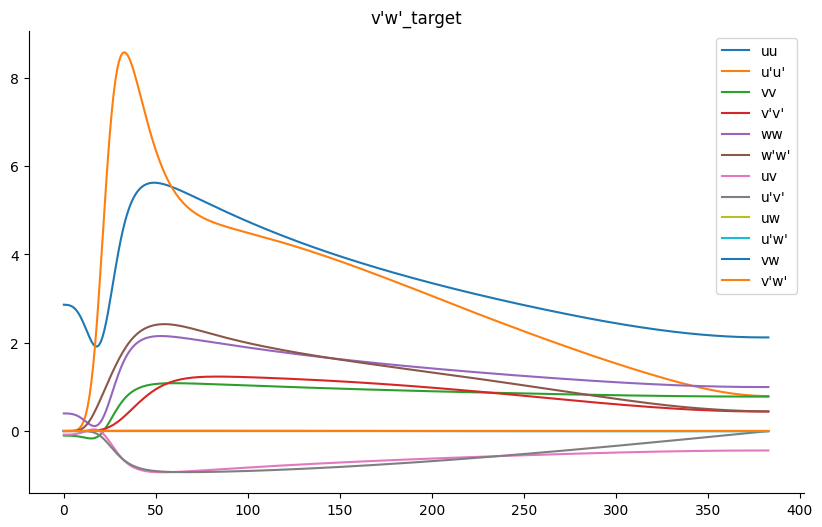

In [ ]:
main_function(3,'poly_lib',1,'STLSQ')

1120
384
1120
(uu)' = -1.972 1 + 0.769 uu + 32.115 vv + -0.025 uu^2 + -0.729 uu vv + -29.992 vv^2
(vv)' = 2.168 1 + -0.057 uu + -7.337 vv + 0.157 uu vv + 5.114 vv^2
(ww)' = 4.388 1 + -0.139 uu + -7.541 vv + 0.243 uu vv + 3.154 vv^2
(uv)' = -1.970 1 + 0.063 uu + 3.580 vv + -0.087 uu vv + -1.598 vv^2
(uw)' = 0.000
(vw)' = 0.000


/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(


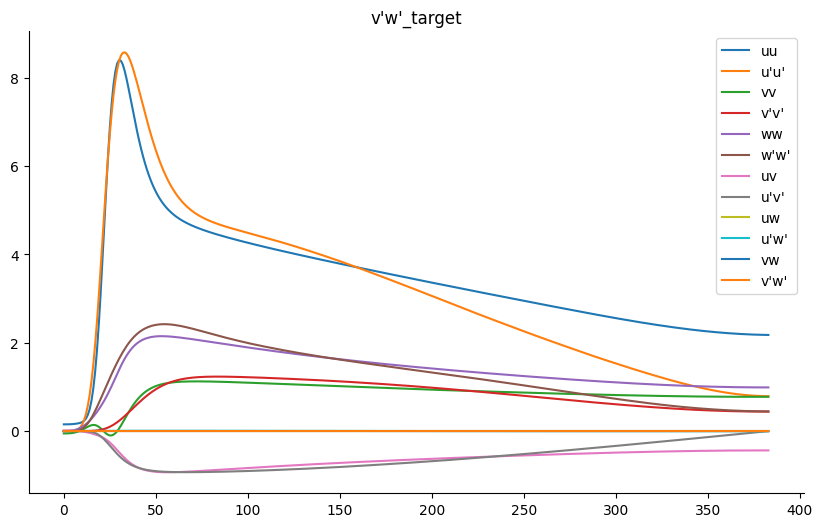

In [ ]:
main_function(3,'poly_lib',2,'STLSQ')

1120
384
1120
(uu)' = 5.048 1 + 0.407 uu + 482.119 vv + -0.021 uu^2 + -35.272 uu vv + -812.119 vv^2 + 0.124 uu^2 vv + 34.166 uu vv^2 + 325.047 vv^3
(vv)' = 3.126 1 + -0.094 uu + 28.331 vv + -2.164 uu vv + -45.972 vv^2 + -0.043 uu^2 vv + 2.204 uu vv^2 + 14.534 vv^3
(ww)' = 6.927 1 + -0.235 uu + 156.779 vv + -11.425 uu vv + -270.120 vv^2 + -0.042 uu^2 vv + 11.517 uu vv^2 + 106.427 vv^3
(uv)' = -2.546 1 + 0.085 uu + -33.403 vv + 2.909 uu vv + 58.479 vv^2 + -0.014 uu^2 vv + -2.844 uu vv^2 + -22.574 vv^3
(uw)' = 0.000
(vw)' = 0.000


/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(


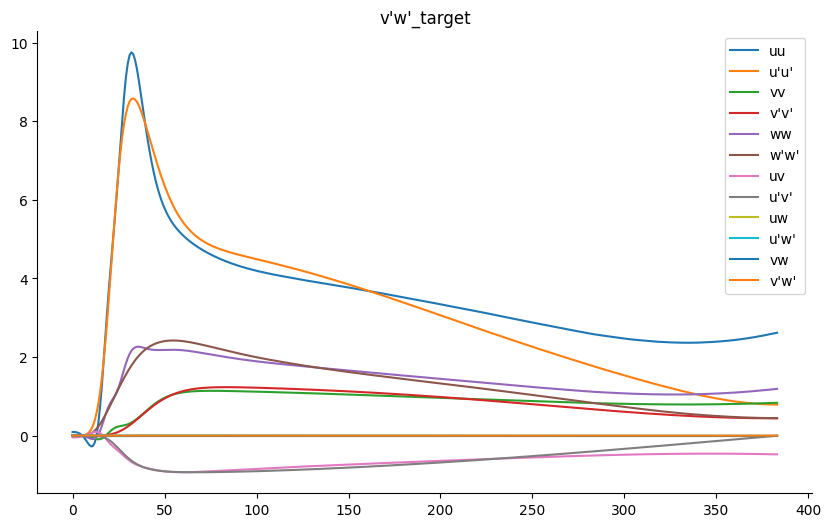

In [ ]:
main_function(3,'poly_lib',3,'STLSQ')

1120
384
1120
(uu)' = 11.967 1 + -0.404 uu + -9.106 vv
(vv)' = 1.780 1 + -0.041 uu + -1.883 vv
(ww)' = 4.406 1 + -0.140 uu + -4.008 vv
(uv)' = -1.915 1 + 0.060 uu + 1.832 vv
(uw)' = 0.000
(vw)' = 0.000


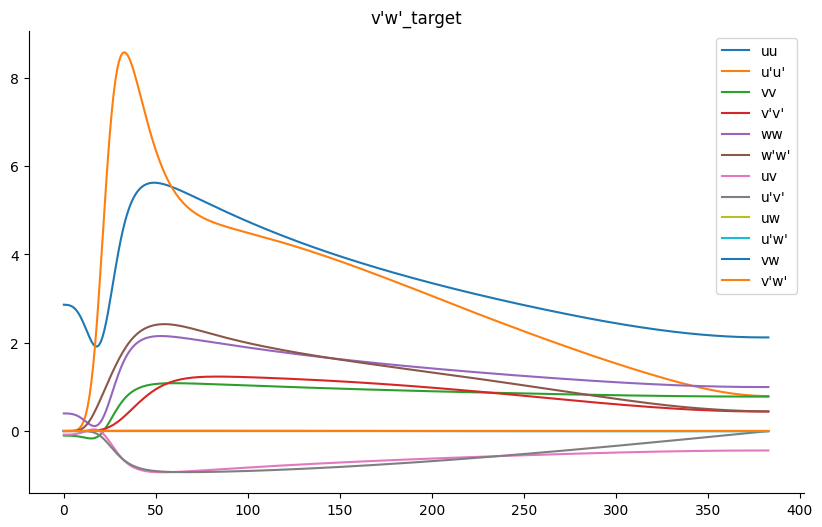

In [ ]:
main_function(3,'poly_lib',1,'SR3')

1120
384
1120
(uu)' = -1.972 1 + 0.769 uu + 32.115 vv + -0.025 uu^2 + -0.729 uu vv + -29.992 vv^2
(vv)' = 2.168 1 + -0.057 uu + -7.337 vv + 0.157 uu vv + 5.114 vv^2
(ww)' = 1.272 1 + 6.331 vv + -0.129 uu vv + -7.530 vv^2
(uv)' = -1.970 1 + 0.063 uu + 3.580 vv + -0.087 uu vv + -1.598 vv^2
(uw)' = 0.003 1 + -0.025 vv + 0.023 vv^2
(vw)' = 0.000


/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/sr3.py:390: ConvergenceWarning: SR3._reduce did not converge after 30 iterations.
  warnings.warn(


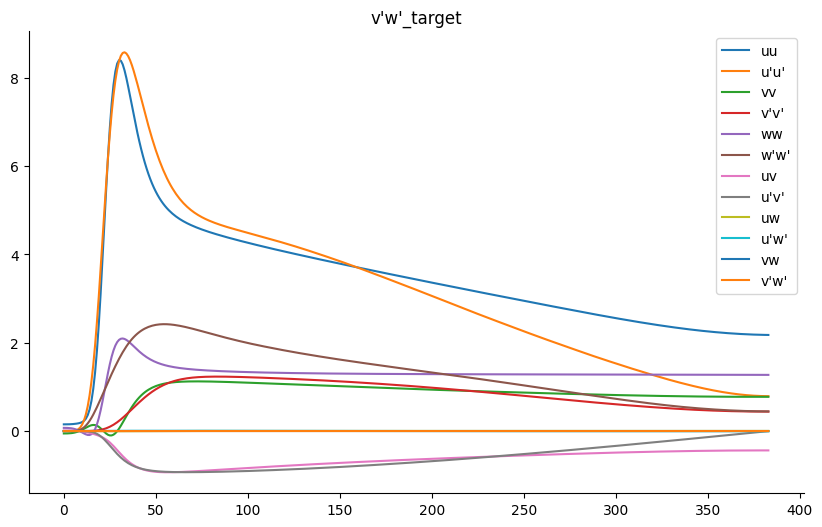

In [ ]:
main_function(3,'poly_lib',2,'SR3')

1120
384
1120
(uu)' = 5.048 1 + 0.407 uu + 482.119 vv + -0.021 uu^2 + -35.272 uu vv + -812.119 vv^2 + 0.124 uu^2 vv + 34.166 uu vv^2 + 325.047 vv^3
(vv)' = 0.442 1 + 0.147 uu + 32.001 vv + -0.005 uu^2 + -2.370 uu vv + -50.261 vv^2 + -0.025 uu^2 vv + 2.204 uu vv^2 + 17.819 vv^3
(ww)' = 7.836 1 + -0.317 uu + 155.537 vv + 0.002 uu^2 + -11.356 uu vv + -268.668 vv^2 + -0.048 uu^2 vv + 11.517 uu vv^2 + 105.315 vv^3
(uv)' = 0.988 1 + -0.232 uu + -38.235 vv + 0.007 uu^2 + 3.180 uu vv + 64.127 vv^2 + -0.036 uu^2 vv + -2.844 uu vv^2 + -26.899 vv^3
(uw)' = 0.005 1 + 0.042 vv + -0.006 uu vv + -0.045 vv^2 + 0.006 uu vv^2 + -0.001 vv^3
(vw)' = -0.001 1 + -0.095 vv + 0.007 uu vv + 0.158 vv^2 + -0.007 uu vv^2 + -0.063 vv^3


/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/sr3.py:390: ConvergenceWarning: SR3._reduce did not converge after 30 iterations.
  warnings.warn(


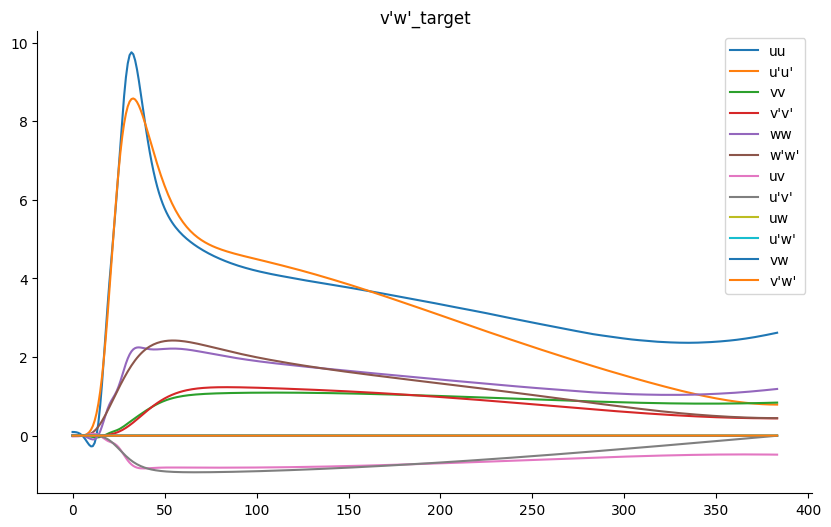

In [ ]:
main_function(3,'poly_lib',3,'SR3')

1120
384
1120
Enter 'STLSQ', 'SR3' or 'FROLS' for optimizer
(uu)' = 11.967 1 + -0.404 uu + -9.106 vv
(vv)' = 0.883 1 + -0.969 vv
(ww)' = 4.406 1 + -0.140 uu + -4.008 vv
(uv)' = -0.593 1 + 0.485 vv
(uw)' = 0.000
(vw)' = 0.000


/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(


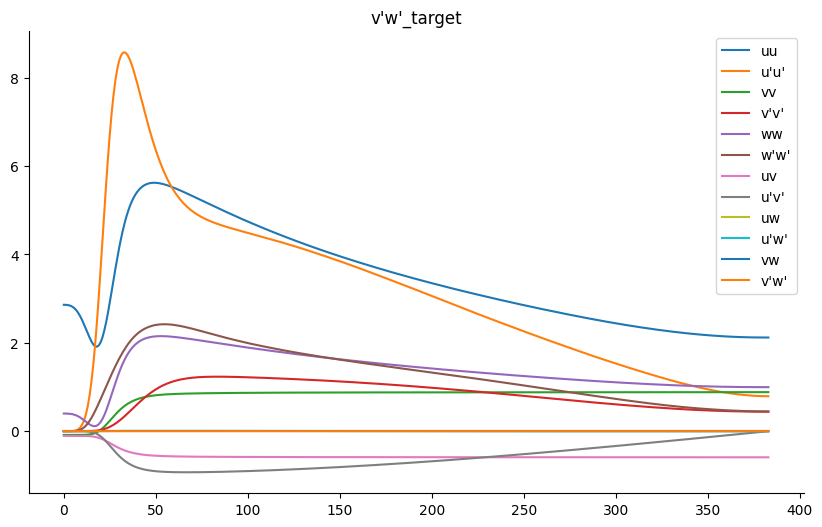

In [ ]:
main_function(3,'poly_lib',1,'FROLS')

1120
384
1120
Enter 'STLSQ', 'SR3' or 'FROLS' for optimizer
(uu)' = 9.225 1 + -0.292 uu + 5.741 vv + 0.457 uu vv + -14.914 vv^2
(vv)' = 0.891 1 + -1.573 vv + 0.661 vv^2
(ww)' = 1.273 1 + 4.064 vv + -5.431 vv^2
(uv)' = -0.567 1 + -1.250 vv + 1.902 vv^2
(uw)' = 0.000
(vw)' = 0.000


/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(


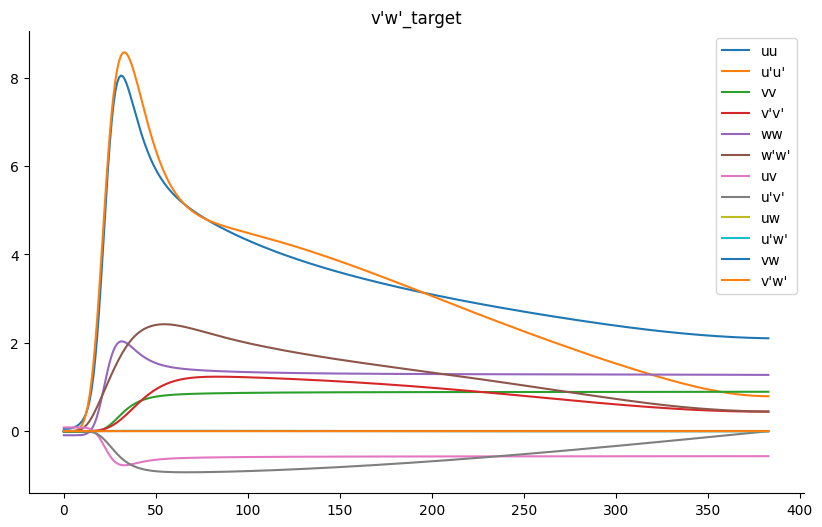

In [ ]:
main_function(3,'poly_lib',2,'FROLS')

1120
384
1120
Enter 'STLSQ', 'SR3' or 'FROLS' for optimizer
(uu)' = 15.482 1 + -0.528 uu + 467.849 vv + -34.470 uu vv + -795.441 vv^2 + 0.058 uu^2 vv + 34.164 uu vv^2 + 312.275 vv^3
(vv)' = 0.877 1 + -4.549 vv^2 + 3.724 vv^3
(ww)' = 6.927 1 + -0.235 uu + 156.779 vv + -11.425 uu vv + -270.120 vv^2 + -0.042 uu^2 vv + 11.517 uu vv^2 + 106.427 vv^3
(uv)' = -0.406 1 + 70.749 vv + -5.216 uu vv + -115.271 vv^2 + 5.061 uu vv^2 + 44.961 vv^3
(uw)' = 0.000
(vw)' = 0.000


/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(


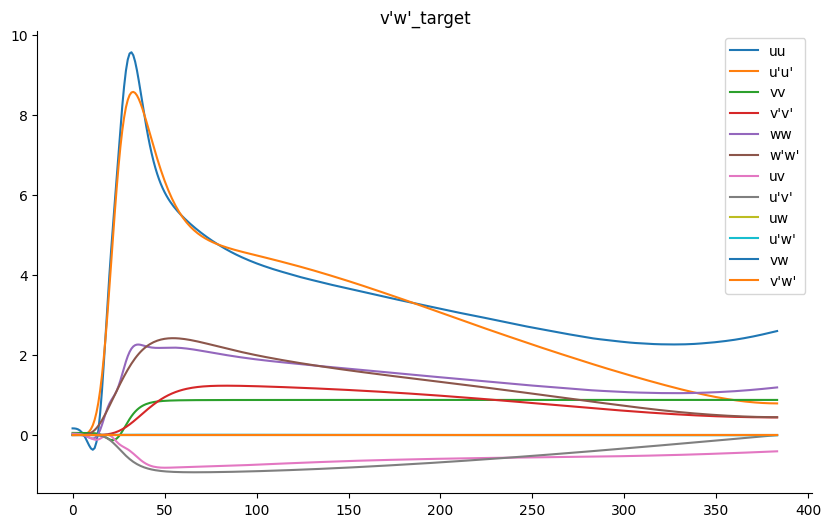

In [ ]:
main_function(3,'poly_lib',3,'FROLS')

1120
384
1120
(uu)' = 11.967 1 + -0.404 uu + -9.106 vv
(vv)' = 1.780 1 + -0.041 uu + -1.883 vv
(ww)' = 4.406 1 + -0.140 uu + -4.008 vv
(uv)' = -1.915 1 + 0.060 uu + 1.832 vv
(uw)' = 0.000
(vw)' = 0.000


/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(


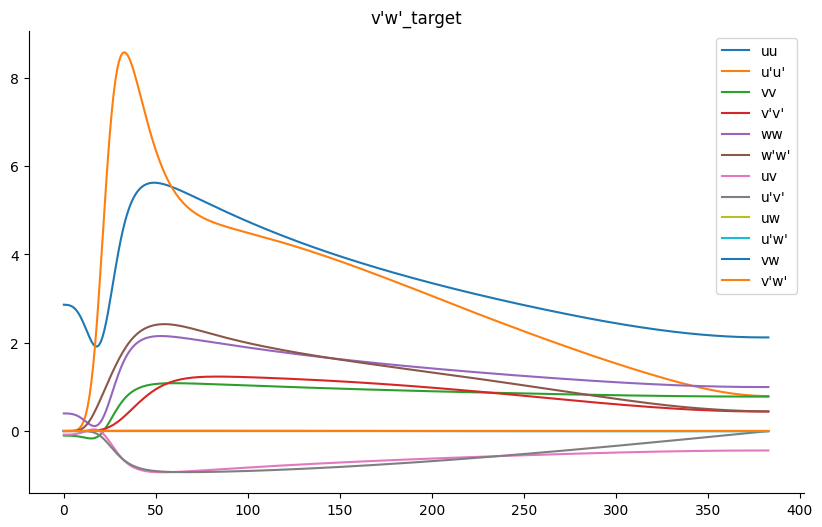

In [ ]:
main_function(4,'poly_lib',1,'STLSQ')

1120
384
1120
(uu)' = 7.964 1 + -0.299 uu + 8.199 vv + -0.163 uu vv + -16.080 vv^2 + 0.592 vv ww
(vv)' = 1.840 1 + -0.059 uu + -6.698 vv + -0.004 uu vv + 4.811 vv^2 + 0.154 vv ww
(ww)' = 3.963 1 + -0.142 uu + -6.712 vv + 0.034 uu vv + 2.761 vv^2 + 0.200 vv ww
(uv)' = -0.531 1 + 0.031 uu + 0.326 uu vv + -0.304 vv ww
(uw)' = 0.000
(vw)' = 0.000


/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(


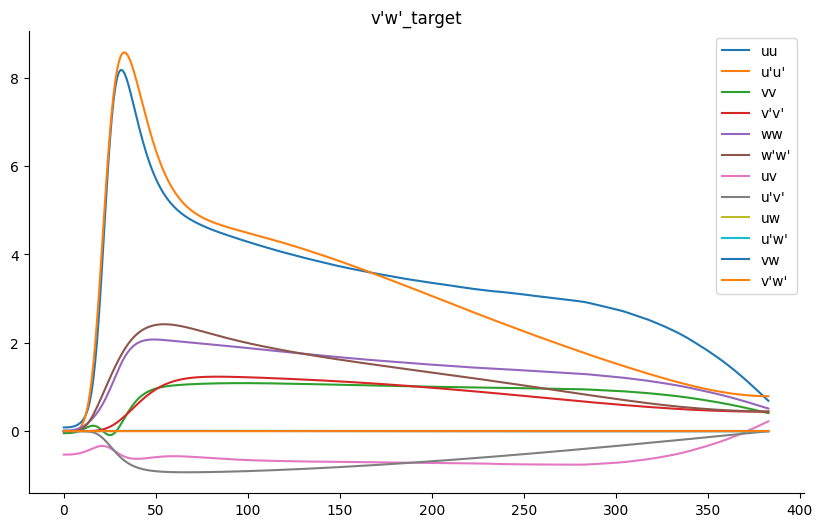

In [ ]:
main_function(4,'poly_lib',2,'STLSQ')

1120
384
1120
(uu)' = 18.558 1 + -1.386 uu + 506.967 vv + 0.027 uu^2 + -38.296 uu vv + -849.229 vv^2 + 5.364 vv ww + -0.102 uu^2 vv + 36.938 uu vv^2 + -0.185 uu vv ww + 323.614 vv^3 + -2.765 vv^2 ww
(vv)' = 1.371 1 + -0.037 uu + 34.093 vv + -2.236 uu vv + -49.306 vv^2 + 0.899 vv ww + -0.076 uu^2 vv + 3.081 uu vv^2 + -0.030 uu vv ww + 13.794 vv^3 + -1.584 vv^2 ww
(ww)' = 14.892 1 + -1.194 uu + 170.790 vv + 0.024 uu^2 + -13.625 uu vv + -298.193 vv^2 + 2.266 vv ww + -0.132 uu^2 vv + 11.598 uu vv^2 + -0.077 uu vv ww + 112.453 vv^3 + 1.013 vv^2 ww
(uv)' = -0.879 1 + 0.036 uu + -33.056 vv + 1.792 uu vv + 47.968 vv^2 + -0.843 vv ww + 0.058 uu^2 vv + -4.066 uu vv^2 + 0.026 uu vv ww + -13.997 vv^3 + 2.993 vv^2 ww
(uw)' = 0.000
(vw)' = 0.000


/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(


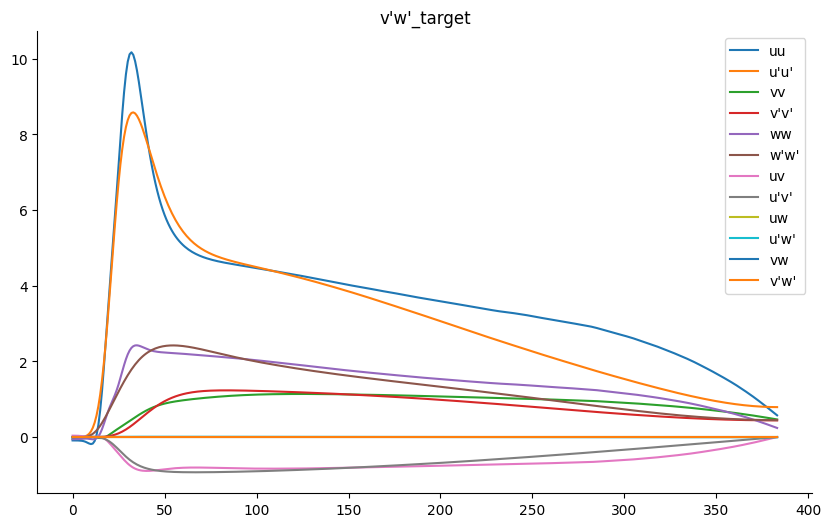

In [ ]:
main_function(4,'poly_lib',3,'STLSQ')

1120
384
1120
(uu)' = 11.967 1 + -0.404 uu + -9.106 vv
(vv)' = 1.780 1 + -0.041 uu + -1.883 vv
(ww)' = 4.406 1 + -0.140 uu + -4.008 vv
(uv)' = -1.915 1 + 0.060 uu + 1.832 vv
(uw)' = 0.002 1 + -0.004 vv
(vw)' = 0.000


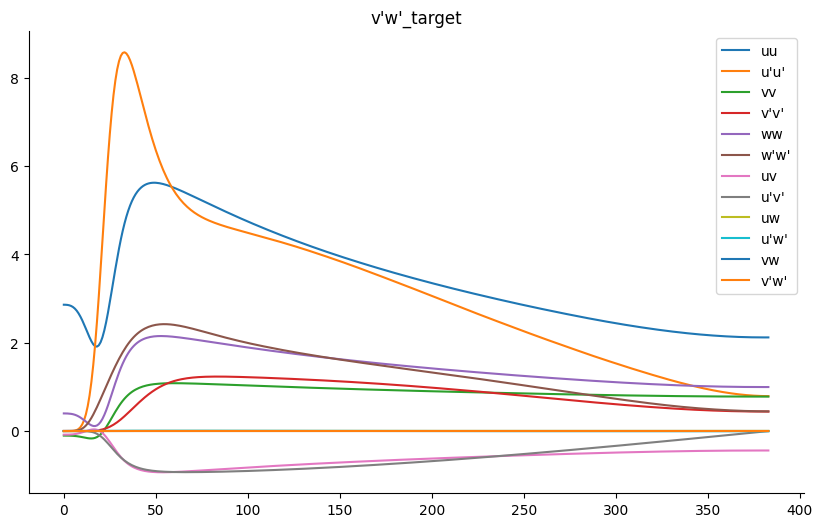

In [ ]:
main_function(4,'poly_lib',1,'SR3')

1120
384
1120
(uu)' = -5.628 1 + 1.138 uu + 36.416 vv + 0.001 ww + -0.038 uu^2 + -1.652 uu vv + -30.664 vv^2 + 0.641 vv ww
(vv)' = -3.739 1 + 0.531 uu + 4.883 vv + -0.016 uu^2 + -0.615 uu vv + -1.174 vv^2 + 0.174 vv ww
(ww)' = 1.617 1 + 0.128 uu + -2.740 vv + -0.008 uu^2 + -0.278 uu vv + 1.126 vv^2 + 0.272 vv ww
(uv)' = 1.187 1 + -0.227 uu + -2.856 vv + 0.008 uu^2 + 0.419 uu vv + 1.664 vv^2 + -0.207 vv ww
(uw)' = 0.000
(vw)' = 0.000


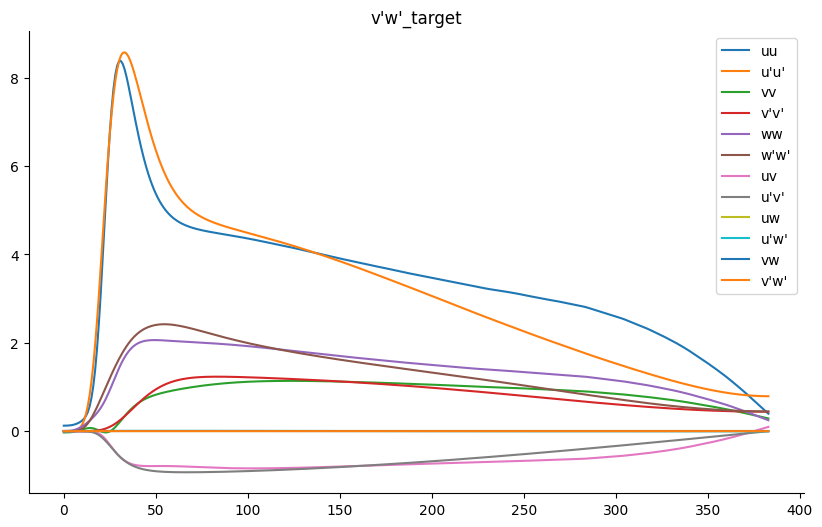

In [ ]:
main_function(4,'poly_lib',2,'SR3')

1120
384
1120
(uu)' = 213.834 1 + -32.927 uu + -119.802 vv + 0.032 ww + 1.796 uu^2 + 24.809 uu vv + -0.001 uu ww + -243.745 vv^2 + -0.408 vv ww + -0.035 uu^3 + -1.722 uu^2 vv + -14.660 uu vv^2 + 0.074 uu vv ww + 149.728 vv^3 + 22.639 vv^2 ww
(vv)' = -3.339 1 + 0.689 uu + 10.577 vv + 0.010 ww + -0.028 uu^2 + -1.101 uu vv + 0.928 vv ww + -0.082 uu^2 vv + -1.380 uu vv^2 + -0.032 uu vv ww + -7.321 vv^3 + 1.131 vv^2 ww
(ww)' = 92.600 1 + -13.322 uu + -80.789 vv + 0.013 ww + 0.678 uu^2 + 9.023 uu vv + -55.041 vv^2 + 0.927 vv ww + -0.012 uu^3 + -0.687 uu^2 vv + -10.930 uu vv^2 + -0.017 uu vv ww + 43.214 vv^3 + 14.214 vv^2 ww
(uv)' = 5.083 1 + -0.791 uu + -12.612 vv + -0.009 ww + 0.029 uu^2 + 0.276 uu vv + -0.747 vv ww + 0.071 uu^2 vv + -0.955 uu vv^2 + 0.023 uu vv ww + 7.601 vv^3 + 1.986 vv^2 ww
(uw)' = 0.000
(vw)' = 0.000


/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/sr3.py:390: ConvergenceWarning: SR3._reduce did not converge after 30 iterations.
  warnings.warn(


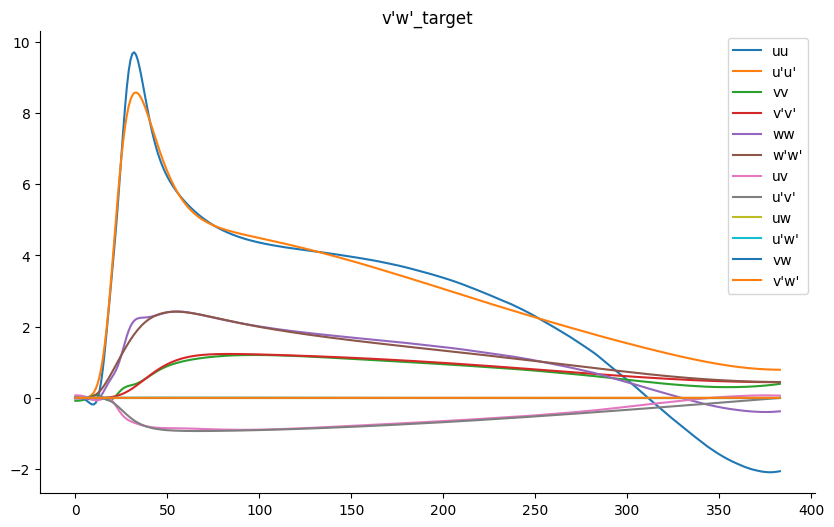

In [ ]:
main_function(4,'poly_lib',3,'SR3')

1120
384
1120
Enter 'STLSQ', 'SR3' or 'FROLS' for optimizer
(uu)' = 11.967 1 + -0.404 uu + -9.106 vv
(vv)' = 0.883 1 + -0.969 vv
(ww)' = 4.406 1 + -0.140 uu + -4.008 vv
(uv)' = -0.593 1 + 0.485 vv
(uw)' = 0.000
(vw)' = 0.000


/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(


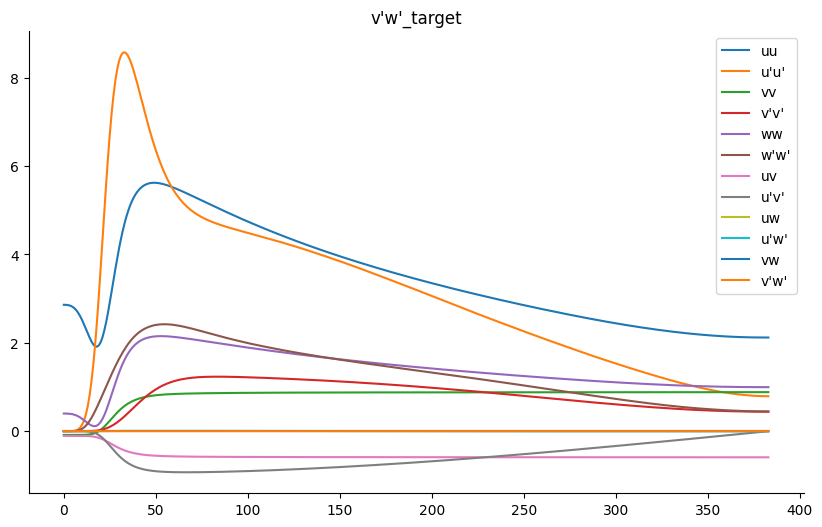

In [ ]:
main_function(4,'poly_lib',1,'FROLS')

1120
384
1120
Enter 'STLSQ', 'SR3' or 'FROLS' for optimizer
(uu)' = 8.082 1 + -0.301 uu + 5.581 vv + -13.747 vv^2 + 0.565 vv ww
(vv)' = 0.567 1 + -0.932 vv + -0.141 uu vv + 0.347 vv^2 + 0.135 vv ww
(ww)' = 3.938 1 + -0.141 uu + -6.159 vv + 2.268 vv^2 + 0.205 vv ww
(uv)' = -0.264 1 + 0.515 vv + -0.127 vv ww
(uw)' = 0.000
(vw)' = 0.000


/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(


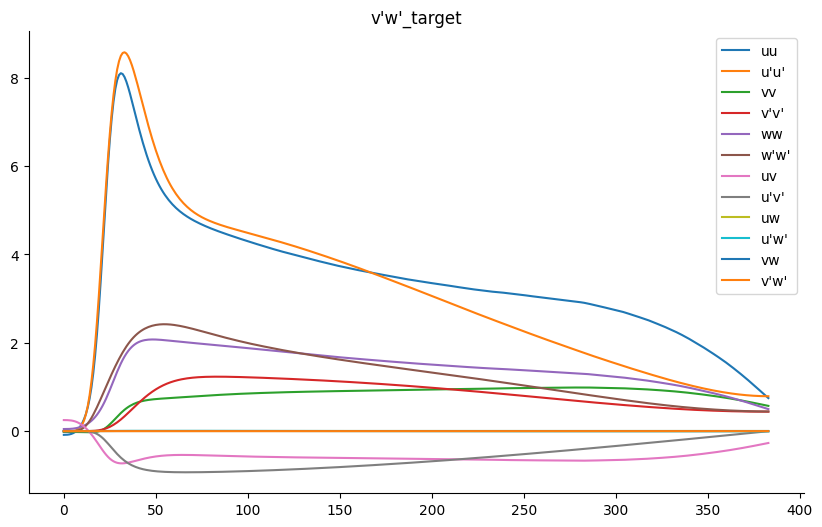

In [ ]:
main_function(4,'poly_lib',2,'FROLS')

1120
384
1120
Enter 'STLSQ', 'SR3' or 'FROLS' for optimizer
(uu)' = 4.765 1 + -0.162 uu + 219.891 vv + -269.988 vv^2 + 4.885 vv ww + -0.999 uu^2 vv + 24.915 uu vv^2 + -0.169 uu vv ww + 44.594 vv^3 + -27.412 vv^2 ww
(vv)' = 0.445 1 + 0.794 uu vv + 0.165 vv ww + 4.541 uu vv^2 + -0.505 vv^3 + -5.437 vv^2 ww
(ww)' = 6.389 1 + -0.237 uu + 140.804 vv + -7.729 uu vv + -229.496 vv^2 + 0.254 vv ww + -0.185 uu^2 vv + 12.759 uu vv^2 + 82.226 vv^3 + -4.890 vv^2 ww
(uv)' = -1.169 uu vv + -0.205 vv ww + -4.647 uu vv^2 + 5.955 vv^2 ww
(uw)' = 0.000
(vw)' = 0.000


/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(


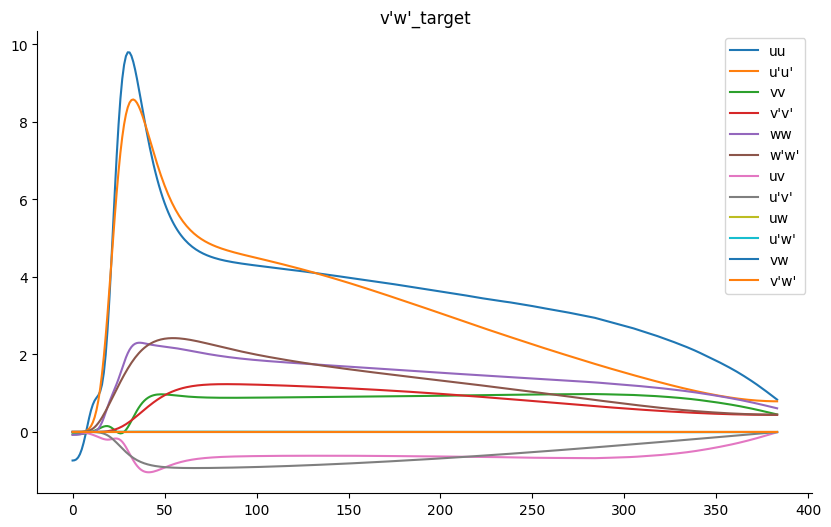

In [ ]:
main_function(4,'poly_lib',3,'FROLS')